In [2]:
%matplotlib notebook

from sympy import init_session
import numpy as np

import matplotlib.pyplot as plt

init_session()

IPython console for SymPy 1.8 (Python 3.8.10-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [3]:
R0 = 1.
deform = 0.43
def R(phi):
    return R0 * (1. + deform * np.sin(phi))

phi_list = np.linspace(0, 1, 101) * 2. * np.pi

In [4]:
# limacon

limacon_coords = []
for phi in phi_list:
    R_now = R(phi)
    
    x = np.cos(phi) * R_now
    y = np.sin(phi) * R_now

    limacon_coords.append([x,y])

limacon_coords = np.transpose(limacon_coords)



# circle

circle_coords = []
for phi in phi_list:
    x = np.cos(phi) * R0
    y = np.sin(phi) * R0

    circle_coords.append([x,y])

circle_coords = np.transpose(circle_coords)

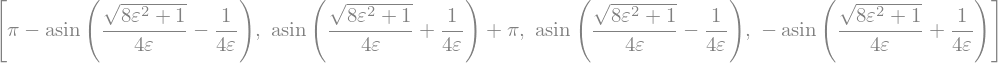

[2.8010068800659575, 0.34058577352383584]


In [5]:
# calculating max_x position with sympy
p = symbols('varphi', real=True, positive=True)
e = symbols('varepsilon', real=True, positive=True)
RR = symbols('R', real=True, positive=True)

xpos = cos(p) * RR * (1 + e * sin(p))
xpos_diff = simplify(xpos.diff(p))
xpos_phibest = solve( Eq(xpos_diff, 0), p )

display(xpos)
display( xpos_diff )
display( xpos_phibest )

# get real solutions
xpos_phibest_eval = [x.replace(e, deform).evalf() for x in xpos_phibest]
real_solutions = [float(x) for x in xpos_phibest_eval if im(x) == 0]

display(xpos_phibest_eval)
display(real_solutions)
print(real_solutions)

In [6]:
# plotting

fig, ax = plt.subplots()

ax.plot(
    limacon_coords[0],
    limacon_coords[1] - deform
    )
ax.plot(*circle_coords)


borderline_dict = dict(
    color='black',
    linestyle='dashed'
    )

for pos in [-R0, R0]:
    ax.axvline(
        pos,
        **borderline_dict
        )
    ax.axhline(
        pos,
        **borderline_dict
        )

for phi in real_solutions:
    print(type(phi))
    x = R0 * np.cos(phi) * (1. + deform * np.sin(phi))
    print(x)
    
    ax.axvline(
        x,
        color='red'
        )
    

ax.set_aspect('equal')

fig.show()

<IPython.core.display.Javascript object>

<class 'float'>
-1.0779454202795318
<class 'float'>
1.0779454202795316
